In [1]:
from __future__ import division, print_function, absolute_import 

In [2]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [20]:
df = pd.read_csv('mergeddata_june22.csv')
print(df.as_matrix().shape)
df

(3539, 22)


,Price,Bedrooms,Bathrooms,Size,Crime,Transit,Shopping,Health,Entertainment,Community,...,Employment,size*crime,size*transit,size*health,size*shopping,size*entertainment,size*community,size*diversity,size*school,size*employment
0,3075000.0,2.0,3.0,2249.0,6.3,90.1,90.1,45.8,41.5,53.5,...,93.0,14168.7,202634.9,103004.2,202634.9,93333.5,120321.5,155181.0,186891.9,209157.0
1,2999990.0,3.0,3.0,2749.0,0.7,45.1,79.6,21.1,73.2,98.6,...,98.6,1924.3,123979.9,58003.9,218820.4,201226.8,271051.4,211123.2,141298.6,271051.4
2,2999900.0,4.0,4.0,3249.0,4.2,96.5,97.2,14.1,79.6,58.5,...,84.5,13645.8,313528.5,45810.9,315802.8,258620.4,190066.5,102993.3,256346.1,274540.5
3,2875000.0,2.0,3.0,2249.0,6.3,90.1,90.1,45.8,41.5,53.5,...,93.0,14168.7,202634.9,103004.2,202634.9,93333.5,120321.5,155181.0,186891.9,209157.0
4,2595000.0,2.0,2.0,1999.0,6.3,90.1,90.1,45.8,41.5,53.5,...,93.0,12593.7,180109.9,91554.2,180109.9,82958.5,106946.5,137931.0,166116.9,185907.0
5,2558000.0,3.0,2.0,2499.0,0.7,45.1,79.6,21.1,73.2,98.6,...,98.6,1749.3,112704.9,52728.9,198920.4,182926.8,246401.4,191923.2,128448.6,246401.4
6,2469000.0,3.0,4.0,3249.0,0.7,45.1,79.6,21.1,73.2,98.6,...,98.6,2274.3,146529.9,68553.9,258620.4,237826.8,320351.4,249523.2,166998.6,320351.4
7,2359990.0,3.0,3.0,1799.0,4.2,96.5,97.2,14.1,79.6,58.5,...,84.5,7555.8,173603.5,25365.9,174862.8,143200.4,105241.5,57028.3,141941.1,152015.5
8,2350000.0,3.0,3.0,1799.0,4.2,96.5,97.2,14.1,79.6,58.5,...,84.5,7555.8,173603.5,25365.9,174862.8,143200.4,105241.5,57028.3,141941.1,152015.5
9,2350000.0,3.0,3.0,1799.0,4.2,96.5,97.2,14.1,79.6,58.5,...,84.5,7555.8,173603.5,25365.9,174862.8,143200.4,105241.5,57028.3,141941.1,152015.5


In [4]:
prices = list(df.as_matrix()[:, 0])
sizes = list(df.as_matrix()[:, 3])
comunities = list(df.as_matrix()[:,9])

In [5]:
print(prices[:10])

[3075000.0, 2999990.0, 2999900.0, 2875000.0, 2595000.0, 2558000.0, 2469000.0, 2359990.0, 2350000.0, 2350000.0]


In [6]:
# matrix_df = df.as_matrix()
# maxi = -1
# for i in range(matrix_df.shape[0]):
# #     if matrix_df[i][1] > maxi:
# #         maxi = matrix_df[i][1]
# #     print(matrix_df[i][2])
#     if matrix_df[i][1] == nan:
#         print("kk")
# # print(maxi)

# # matrix_df = matrix_df/np.amax(matrix_df, axis=0)

# # print(matrix_df.shape)

In [7]:
def get_data(path):
    df = pd.read_csv(path)
    matrix_df = df.as_matrix()
#     mat = matrix_df[:, 1:]
    mat = matrix_df
    where_are_NaNs = np.isnan(mat)
    mat[where_are_NaNs] = 0
    maximums = np.amax(mat, axis=0)
#     print(maximums)
    mat = mat/maximums
    return mat 

In [8]:
mat = get_data("mergeddata_june22.csv")
# print(mat[:5])

[  1.50000000e+07   6.00000000e+00   5.00000000e+00   4.32600000e+03
   9.51000000e+01   9.86000000e+01   9.86000000e+01   9.86000000e+01
   9.79000000e+01   9.86000000e+01   9.86000000e+01   9.86000000e+01
   9.86000000e+01   3.56462400e+05   3.13528500e+05   4.26543600e+05
   3.44349600e+05   3.16663200e+05   4.26543600e+05   3.38293200e+05
   2.56346100e+05   4.26543600e+05]


In [25]:
print(mat[:3])

[[ 0.205       0.33333333  0.6         0.5198798   0.06624606  0.9137931
   0.9137931   0.46450304  0.42390194  0.54259635  0.69979716  0.84279919
   0.94320487  0.03974809  0.64630456  0.24148575  0.58845691  0.2947406
   0.28208488  0.45871747  0.72906083  0.49035315]
 [ 0.19999933  0.5         0.6         0.63546001  0.00736067  0.45740365
   0.80730223  0.21399594  0.74770174  1.          0.77890467  0.52129817
   1.          0.00539833  0.39543423  0.13598586  0.63546001  0.63546001
   0.63546001  0.62408349  0.55120246  0.63546001]
 [ 0.19999333  0.66666667  0.8         0.75104022  0.04416404  0.97870183
   0.98580122  0.14300203  0.81307457  0.59330629  0.32150101  0.80020284
   0.85699797  0.03828118  1.          0.10740028  0.91709937  0.81670494
   0.44559689  0.30444981  1.          0.64363995]]


In [9]:
def next_batch(mat, index, size):
    if index + size <= mat.shape[0]:
        return index+size, mat[index:index+size]
    else:
        return index+size-mat.shape[0], np.concatenate((mat[index:], mat[:index+size-mat.shape[0]]), axis=0)

In [10]:
learning_rate = 0.01
training_epochs = 500 
batch_size = 50
display_step = 25
examples_to_show = 10
index = 0


In [11]:
n_hidden_1 = 12
n_hidden_2 = 6
n_hidden_3 = 1
n_input = 22

In [12]:
X = tf.placeholder("float", [None, n_input])

In [13]:
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'encoder_h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_2])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h3': tf.Variable(tf.random_normal([n_hidden_1, n_input]))
}

biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'encoder_b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b2': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b3': tf.Variable(tf.random_normal([n_input]))
}

In [22]:
health_weights = weights['encoder_h1'][7]
print(health_weights.shape)
print(type(health_weights))

(12,)
<class 'tensorflow.python.framework.ops.Tensor'>


In [14]:
def encoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['encoder_h3']), biases['encoder_b3']))
    return layer_3

def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']), biases['decoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['decoder_h3']), biases['decoder_b3']))
    return layer_3

In [15]:
# Construct model 
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

In [16]:
# Prediction 
y_pred = decoder_op 
y_true = X

In [24]:
health_penalty = 10

In [225]:
# loss and optimizer 
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2)) + 
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [226]:
init = tf.global_variables_initializer()

Epoch: 0001 cost= 0.142914489
Epoch: 0026 cost= 0.027270265
Epoch: 0051 cost= 0.028055171
Epoch: 0076 cost= 0.020659743
Epoch: 0101 cost= 0.016551787
Epoch: 0126 cost= 0.015596331
Epoch: 0151 cost= 0.014209731
Epoch: 0176 cost= 0.015045568
Epoch: 0201 cost= 0.015555513
Epoch: 0226 cost= 0.016787661
Epoch: 0251 cost= 0.015587890
Epoch: 0276 cost= 0.014222378
Epoch: 0301 cost= 0.014185881
Epoch: 0326 cost= 0.010426686
Epoch: 0351 cost= 0.012784380
Epoch: 0376 cost= 0.007673865
Epoch: 0401 cost= 0.011320084
Epoch: 0426 cost= 0.020123312
Epoch: 0451 cost= 0.007390288
Epoch: 0476 cost= 0.012873696
Optimization Finished!


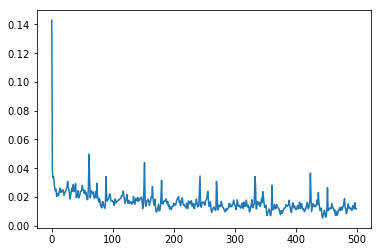

In [227]:
with tf.Session() as sess:
    sess.run(init)
    total_c = []
    total_batch = int(mat.shape[0]/batch_size)
    
    for epoch in range(training_epochs):
        for i in range(total_batch):
            index, batch_xs = next_batch(mat, index, batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
         
        total_c.append(c)
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1),"cost=", "{:.9f}".format(c))
    print("Optimization Finished!")
    
    score = sess.run(encoder_op, feed_dict={X: mat})
    scores = list(score)

plt.plot(total_c)

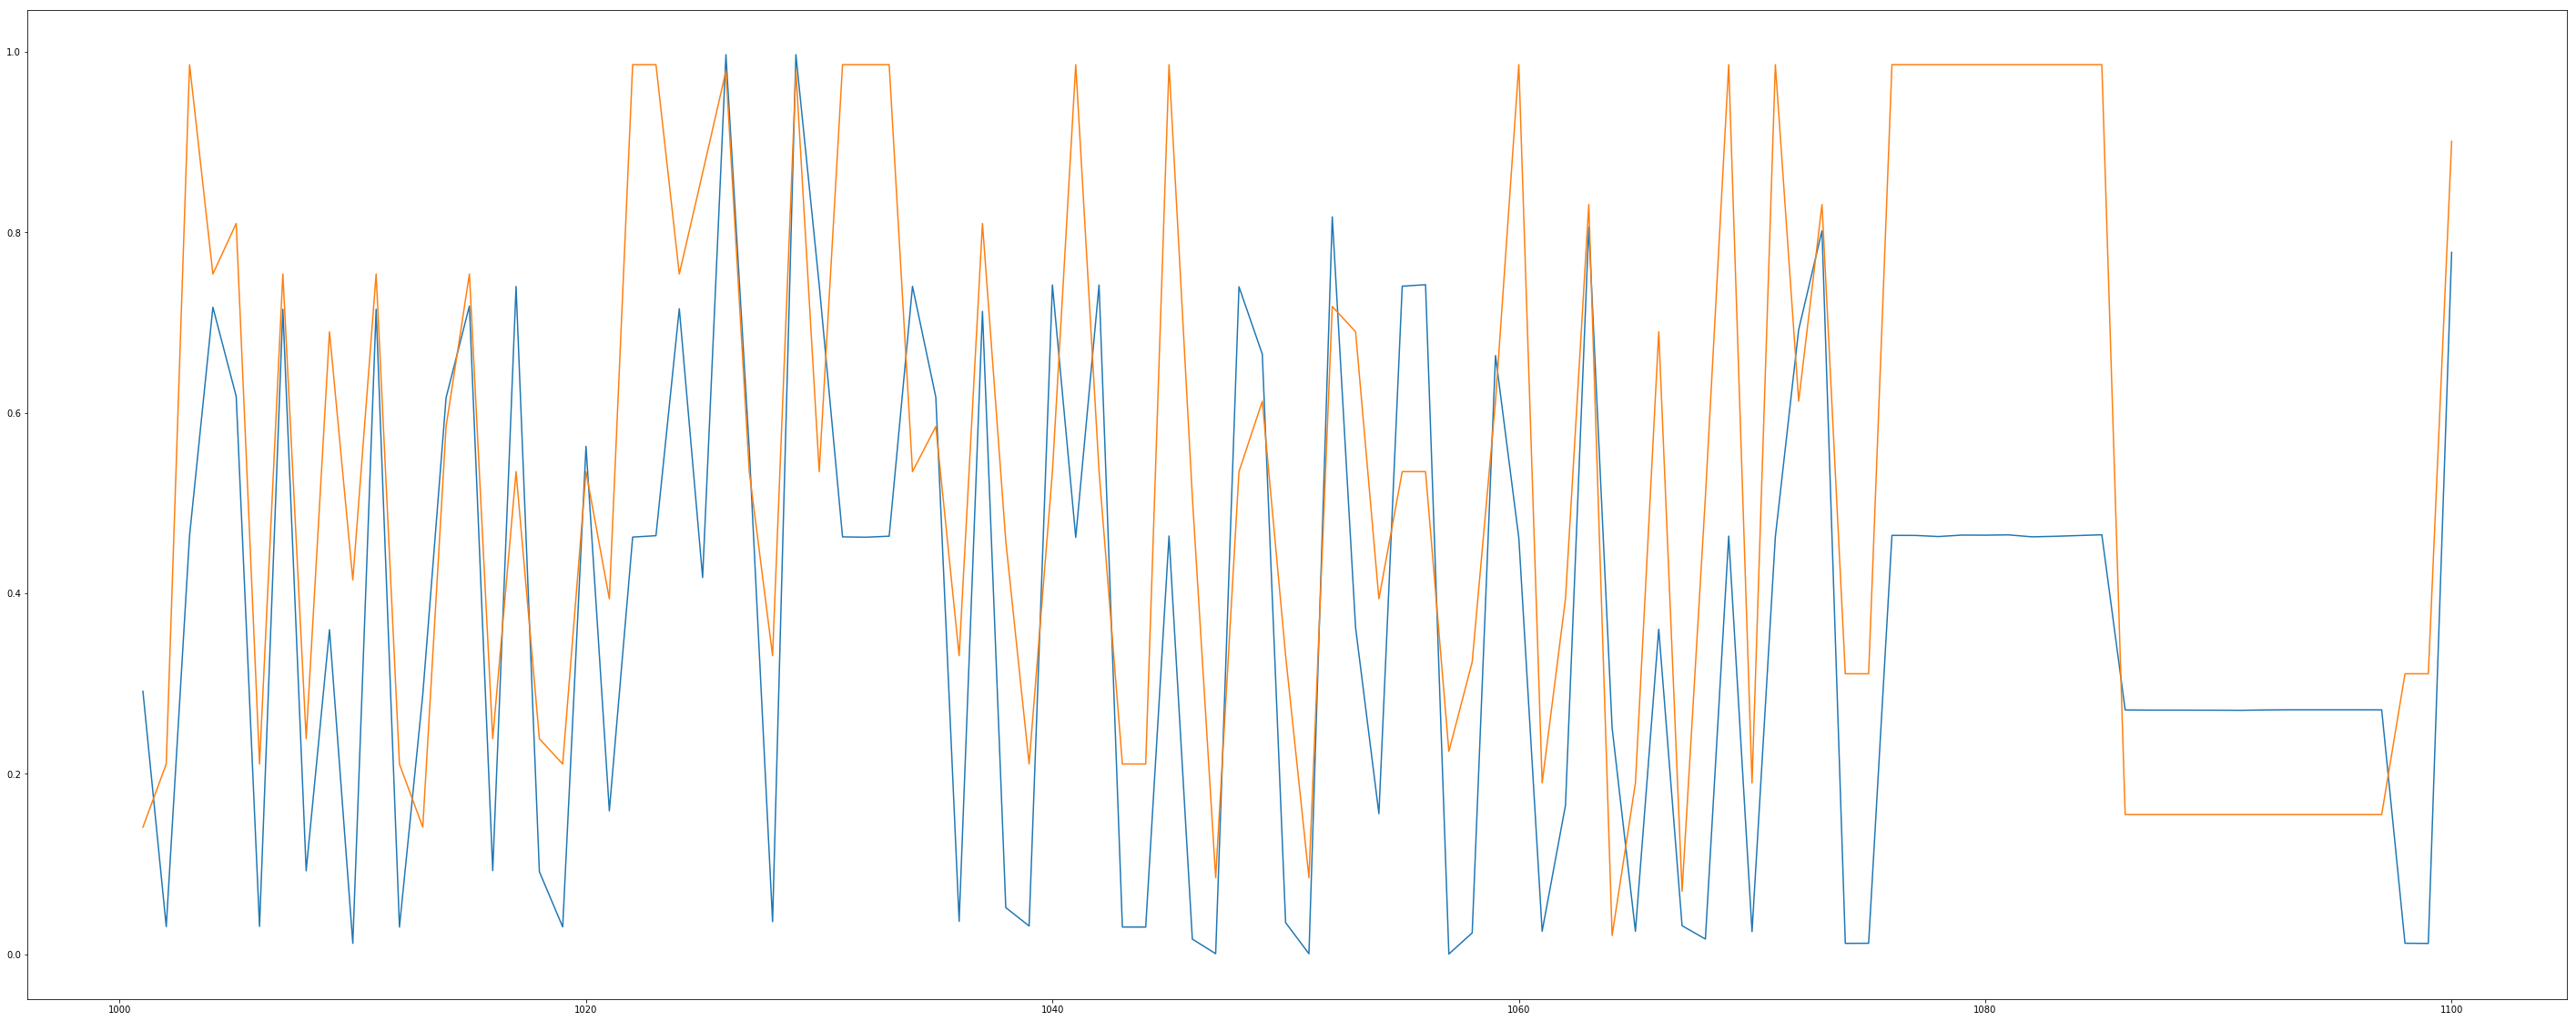

In [266]:
x_line = range(1,mat.shape[0]+1)
plt.figure(figsize=(50, 20))
plt.plot(x_line[1000:1100], scores[1000:1100], x_line[1000:1100], [com/100 for com in comunities][1000:1100])# [price/1000000 for price in prices][:2000], 'r--', x_line[:2000], [size/1000 for size in sizes][:2000], 'black')

In [231]:
print(scores)

[array([ 0.55844378], dtype=float32), array([ 0.46352074], dtype=float32), array([ 0.61633211], dtype=float32), array([ 0.55914217], dtype=float32), array([ 0.55952352], dtype=float32), array([ 0.46377531], dtype=float32), array([ 0.46331319], dtype=float32), array([ 0.61735213], dtype=float32), array([ 0.6173532], dtype=float32), array([ 0.6173532], dtype=float32), array([ 0.617423], dtype=float32), array([ 0.4659501], dtype=float32), array([ 0.5604195], dtype=float32), array([ 0.61745083], dtype=float32), array([ 0.56067067], dtype=float32), array([ 0.61717689], dtype=float32), array([ 0.56075722], dtype=float32), array([ 0.46236956], dtype=float32), array([ 0.61747408], dtype=float32), array([ 0.46235207], dtype=float32), array([ 0.56000221], dtype=float32), array([ 0.61754966], dtype=float32), array([ 0.56142324], dtype=float32), array([ 0.4654564], dtype=float32), array([ 0.56003678], dtype=float32), array([ 0.61735779], dtype=float32), array([ 0.46449301], dtype=float32), array([

In [233]:
print(scores[0])

[ 0.55844378]
